In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie=pd.read_csv("movie_metadata.csv")

In [3]:
print("The shape of data is:",movie.shape)

The shape of data is: (5043, 28)


In [4]:
movie.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
movie.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
print("Total null vaules in data is:",movie.isnull().sum().sum())

Total null vaules in data is: 2698


In [10]:
clean_data=movie.dropna(how='any')

In [12]:
print("New dataframe shape is:",clean_data.shape)
print("Old dataframe shape is:",movie.shape)

New dataframe shape is: (3756, 28)
Old dataframe shape is: (5043, 28)


In [13]:
movie.fillna(value=0,inplace=True)

In [15]:
movie[['gross','budget']]=movie[['gross','budget']].fillna(value=0)

In [16]:
movie['language']=movie['language'].fillna('no info',inplace=True)

In [17]:
movie['budget']=movie['budget'].fillna(movie['budget'].mean(),inplace=True)

In [23]:
duplicate=movie[movie.duplicated()]

In [25]:
print("The no of duplicate data is: ",duplicate.shape)

The no of duplicate data is:  (45, 28)


In [26]:
duplicate_link=movie[movie.duplicated(['movie_imdb_link'])]

In [27]:
print("The shape of duplicated link is:",duplicate_link.shape)

The shape of duplicated link is: (124, 28)


In [31]:
op_labels=['poor','moderate','excellent']
category=[0.,4.,7.,10.]
movie['imdb_label']=pd.cut(movie['imdb_score'],labels=op_labels,bins=category)

In [32]:
movie['imdb_label'].value_counts()

moderate     3275
excellent    1594
poor          174
Name: imdb_label, dtype: int64

In [39]:
print(movie[['movie_title','imdb_score','imdb_label']])

                                            movie_title  imdb_score imdb_label
0                                               Avatar          7.9  excellent
1             Pirates of the Caribbean: At World's End          7.1  excellent
2                                              Spectre          6.8   moderate
3                                The Dark Knight Rises          8.5  excellent
4     Star Wars: Episode VII - The Force Awakens    ...         7.1  excellent
...                                                 ...         ...        ...
5038                           Signed Sealed Delivered          7.7  excellent
5039                         The Following                      7.5  excellent
5040                              A Plague So Pleasant          6.3   moderate
5041                                  Shanghai Calling          6.3   moderate
5042                                 My Date with Drew          6.6   moderate

[5043 rows x 3 columns]


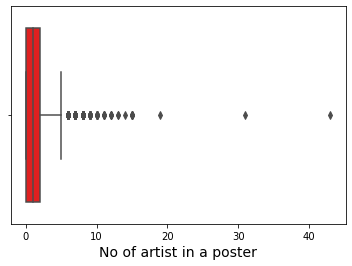

In [42]:
sns.boxplot(x=movie['facenumber_in_poster'],color='red')
plt.xlabel('No of artist in a poster',fontsize=14)
plt.show()

In [50]:
movie[['movie_title','facenumber_in_poster']].iloc[movie['facenumber_in_poster'].idxmax()]

movie_title             500 Days of Summer 
facenumber_in_poster                     43
Name: 3468, dtype: object

In [47]:
movie['facenumber_in_poster'].describe()

count    5043.000000
mean        1.367638
std         2.012180
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64

In [51]:
def outlier_treatment(column):
    sorted(column)
    Q1,Q3=np.percentile(column,[25,75])
    IQR=Q3-Q1
    l=Q1-(1.5*IQR)
    u=Q3+(1.5*IQR)
    return l,u

In [58]:
l,u=outlier_treatment(movie['facenumber_in_poster'])

In [59]:
l

-3.0

In [60]:
u

5.0

In [61]:
movie[(movie['facenumber_in_poster']>u) | (movie['facenumber_in_poster']<l)]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_lable,imdb_label
23,Color,Peter Jackson,509.0,186.0,0.0,773.0,Adam Brown,5000.0,258355354.0,Adventure|Fantasy,...,USA,PG-13,None,2013.0,972.0,7.9,2.35,83000,excellent,excellent
47,Color,Bryan Singer,539.0,149.0,0.0,20000.0,Peter Dinklage,34000.0,233914986.0,Action|Adventure|Fantasy|Sci-Fi|Thriller,...,USA,PG-13,None,2014.0,22000.0,8.0,2.35,82000,excellent,excellent
65,Color,Bryan Singer,396.0,144.0,0.0,1000.0,Michael Fassbender,34000.0,154985087.0,Action|Adventure|Sci-Fi,...,USA,PG-13,None,2016.0,13000.0,7.3,2.35,54000,excellent,excellent
73,Color,David Ayer,418.0,123.0,452.0,329.0,Robin Atkin Downes,10000.0,161087183.0,Action|Adventure|Comedy|Sci-Fi,...,USA,PG-13,None,2016.0,336.0,6.9,2.35,80000,moderate,moderate
134,Color,Tim Burton,526.0,113.0,13000.0,16000.0,Chloë Grace Moretz,40000.0,79711678.0,Comedy|Fantasy|Horror,...,USA,PG-13,None,2012.0,17000.0,6.2,1.85,82000,moderate,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Color,Cédric Klapisch,29.0,91.0,82.0,8.0,Zinedine Soualem,75.0,1652472.0,Comedy|Romance,...,France,R,None,1996.0,9.0,6.9,1.66,166,moderate,moderate
4847,Color,Jerome Elston Scott,8.0,98.0,3.0,248.0,Joanna Cassidy,500.0,0.0,Comedy|Drama|Romance,...,USA,R,None,2010.0,317.0,7.2,0.00,7,excellent,excellent
4883,Color,Joel Paul Reisig,1.0,108.0,431.0,3.0,Dana Blackstone,288.0,0.0,Family,...,USA,PG,None,2014.0,96.0,6.6,0.00,71,moderate,moderate
4900,Color,David G. Evans,25.0,101.0,0.0,16.0,Chris Thomas,77000.0,2428241.0,Drama,...,USA,PG-13,None,2010.0,21.0,6.4,0.00,0,moderate,moderate


In [65]:
movie.drop(movie[(movie['facenumber_in_poster']>u) | (movie['facenumber_in_poster']<l)].index,inplace=True)

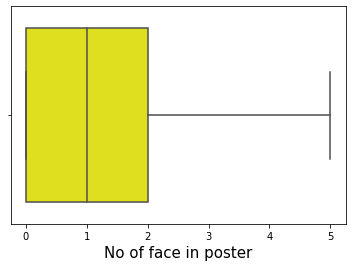

In [69]:
sns.boxplot(x=movie['facenumber_in_poster'],color='yellow')
plt.xlabel("No of face in poster",fontsize=15)
plt.show()

In [70]:
movie.dtypes

color                          object
director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_2_name                   object
actor_1_facebook_likes        float64
gross                         float64
genres                         object
actor_1_name                   object
movie_title                    object
num_voted_users                 int64
cast_total_facebook_likes       int64
actor_3_name                   object
facenumber_in_poster          float64
plot_keywords                  object
movie_imdb_link                object
num_user_for_reviews          float64
language                       object
country                        object
content_rating                 object
budget                         object
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                    float64
aspect_ratio